In [2]:
import pandas as pd # Veri manipülasyonu için zaten bildiğiniz kütüphane
import matplotlib.pyplot as plt # Matplotlib'in temel çizim aracı
import seaborn as sns # İstatistiksel veri görselleştirmesi için daha yüksek seviyeli bir kütüphane


In [3]:
# Rastgele veri ile bir DataFrame oluşturalım
data = {
    'Yaş': [23, 34, 45, 28, 39, 50, 22, 31, 42, 36],
    'Gelir': [40000, 60000, 80000, 45000, 70000, 90000, 38000, 55000, 75000, 65000],
    'Cinsiyet': ['Kadın', 'Erkek', 'Kadın', 'Erkek', 'Kadın', 'Erkek', 'Kadın', 'Erkek', 'Kadın', 'Erkek'],
    'Eğitim Seviyesi': ['Üniversite', 'Yüksek Lisans', 'Doktora', 'Üniversite', 'Yüksek Lisans', 'Doktora', 'Üniversite', 'Yüksek Lisans', 'Doktora', 'Üniversite']
}
df = pd.DataFrame(data)
print(df.head())

   Yaş  Gelir Cinsiyet Eğitim Seviyesi
0   23  40000    Kadın      Üniversite
1   34  60000    Erkek   Yüksek Lisans
2   45  80000    Kadın         Doktora
3   28  45000    Erkek      Üniversite
4   39  70000    Kadın   Yüksek Lisans


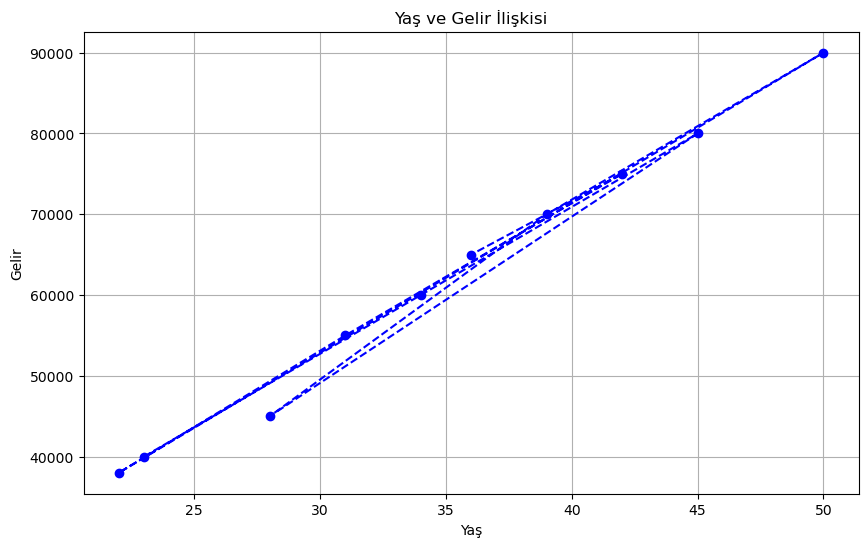

In [4]:
plt.figure(figsize=(10, 6)) # Çizimin boyutunu ayarlar
plt.plot(df['Yaş'], df['Gelir'], marker='o', linestyle='--', color='blue') # x ve y ekseni, işaretçi, çizgi stili, renk
plt.title('Yaş ve Gelir İlişkisi') # Grafiğin başlığı
plt.xlabel('Yaş') # x ekseni etiketi
plt.ylabel('Gelir') # y ekseni etiketi
plt.grid(True) # Izgarayı gösterir
plt.show() # Grafiği gösterir

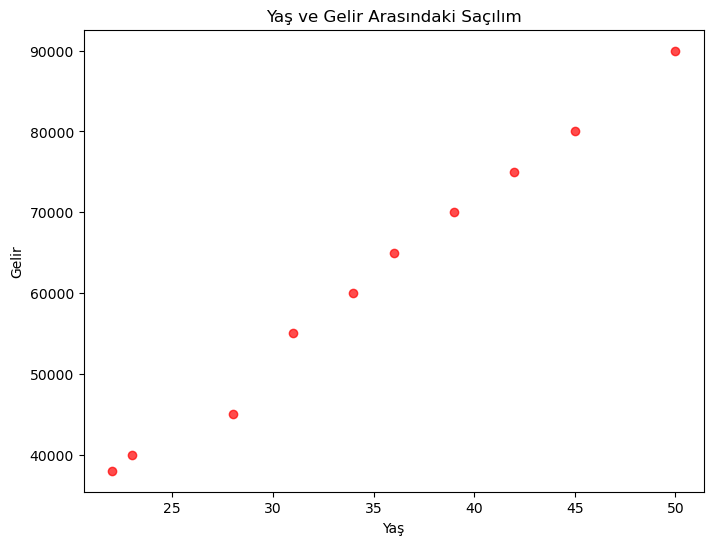

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Yaş'], df['Gelir'], c='red', alpha=0.7) # c: renk, alpha: saydamlık
plt.title('Yaş ve Gelir Arasındaki Saçılım')
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.show()

Seaborn, Matplotlib üzerine inşa edilmiş, 

istatistiksel grafikler oluşturmak için daha yüksek seviyeli bir kütüphanedir. 

Genellikle daha estetik ve daha az kodla karmaşık grafikler oluşturmanızı sağlar.

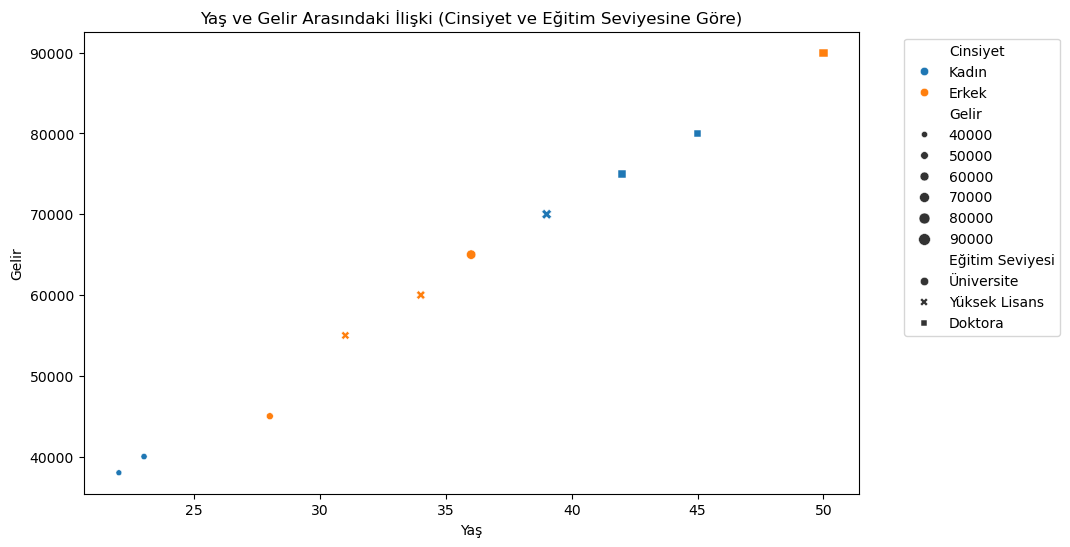

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Yaş', y='Gelir', hue='Cinsiyet', style='Eğitim Seviyesi', size='Gelir', data=df)
# 'hue': Cinsiyet'e göre renk, 
# 'style': Eğitim Seviyesi'ne göre işaretçi stili, 
# 'size': Gelir'e göre işaretçi boyutu
plt.title('Yaş ve Gelir Arasındaki İlişki (Cinsiyet ve Eğitim Seviyesine Göre)')
plt.xlabel('Yaş')
plt.ylabel('Gelir')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # legend sağa kaydır
plt.show()

Grafik çizmeden önce veriyi doğru formatta ve uygun şekilde hazırlamak gerçekten çok önemli. Çünkü:

Görselleştirme araçları genellikle veri şekline (formatına) bağımlıdır.

Eğer veri düzgün temizlenip filtrelenmez, grafik yanlış ya da yanıltıcı olabilir.

Grafik aşamasında karmaşık filtreleme/sorgulamalar yapmak, kodun okunabilirliğini azaltır, hata yapma riskini artırır.

In [7]:
# Pandas ile Excel Dosyası Okuma
# Excel dosyasını okuma
son_10_yıl=pd.read_excel("yillara gore il nufuslari(2014-2024).xls")

In [9]:
# Ankara, İstanbul ve İzmir illerinin son 10 yıl nüfus verilerini çizgi grafiğini çizmek istiyorum

#ilk önce veriyi filtreleyip sadece gerekli illeri alalım
son_10_yıl_filtered = son_10_yıl[son_10_yıl['İL'].isin(['Ankara', 'İstanbul', 'İzmir'])] 
#isin metodu ne işe yarar?
# Bu metot, belirtilen değerlerin bulunduğu satırları seçer.
#  Yani, 'İL' sütununda 'Ankara', 'İstanbul' veya 'İzmir' olan satırları alır.

# Şimdi filtrelenmiş veriyi çizgi grafiği ile görselleştirelim

In [10]:
print(son_10_yıl_filtered)

          İL      2014      2015      2016      2017      2018      2019  \
5     Ankara   5150072   5270575   5346518   5445026   5503985   5639076   
33  İstanbul  14377018  14657434  14804116  15029231  15067724  15519267   
34     İzmir   4113072   4168415   4223545   4279677   4320519   4367251   

        2020      2021      2022      2023      2024  
5    5663322   5747325   5782285   5803482   5864049  
33  15462452  15840900  15907951  15655924  15701602  
34   4394694   4425789   4462056   4479525   4493242  


Verinin yatay eksende uzaması kötü bir durumdur, dikey uzaması daha kullanışlıdır.


In [21]:
df_uzun = son_10_yıl_filtered.melt(
    id_vars=['İL'],             # Sabit tutulacak sütun
    var_name='Yıl',             # Eritilen sütun başlıklarının yeni adı ('2014', '2015' vb.)
    value_name='Nüfus' )         # Eritilen sütunlardaki değerlerin yeni adı (nüfus sayıları)

In [22]:
print(df_uzun)

          İL   Yıl     Nüfus
0     Ankara  2014   5150072
1   İstanbul  2014  14377018
2      İzmir  2014   4113072
3     Ankara  2015   5270575
4   İstanbul  2015  14657434
5      İzmir  2015   4168415
6     Ankara  2016   5346518
7   İstanbul  2016  14804116
8      İzmir  2016   4223545
9     Ankara  2017   5445026
10  İstanbul  2017  15029231
11     İzmir  2017   4279677
12    Ankara  2018   5503985
13  İstanbul  2018  15067724
14     İzmir  2018   4320519
15    Ankara  2019   5639076
16  İstanbul  2019  15519267
17     İzmir  2019   4367251
18    Ankara  2020   5663322
19  İstanbul  2020  15462452
20     İzmir  2020   4394694
21    Ankara  2021   5747325
22  İstanbul  2021  15840900
23     İzmir  2021   4425789
24    Ankara  2022   5782285
25  İstanbul  2022  15907951
26     İzmir  2022   4462056
27    Ankara  2023   5803482
28  İstanbul  2023  15655924
29     İzmir  2023   4479525
30    Ankara  2024   5864049
31  İstanbul  2024  15701602
32     İzmir  2024   4493242


<Axes: xlabel='İL', ylabel='Nüfus'>

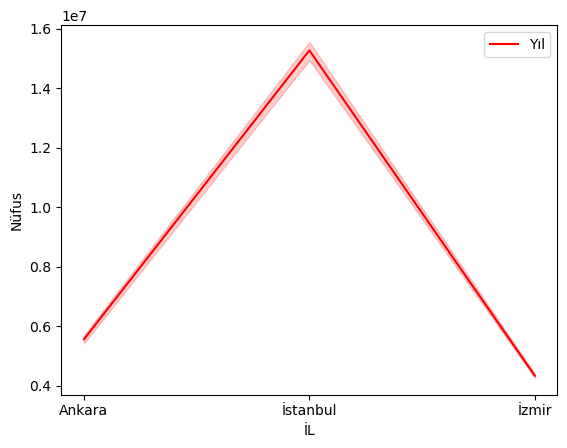

In [ ]:
sns.lineplot(data=df_uzun, x='İL', y='Nüfus', label='Yıl', color='red',)

In [ ]:
#plt.ticklabel_format(axis='y', style='plain') # Y eksenindeki sayıları düz formatta gösteriyoruz
#1e7 formatı bilimsel formattır yukarodaki gibi kod formatı ile float formatını değiştirebiliriz.

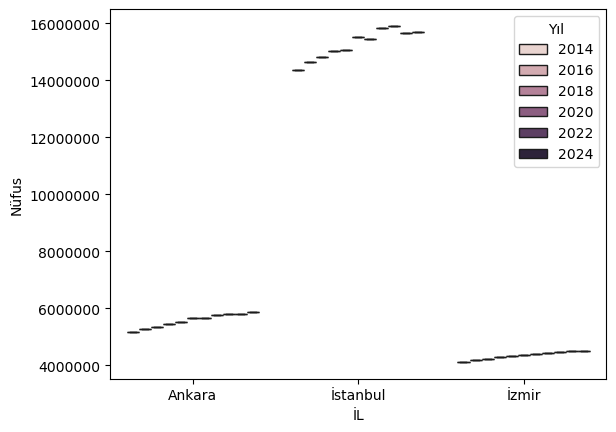

In [30]:
sns.boxplot(data=df_uzun, x='İL', y='Nüfus', hue='Yıl')
plt.ticklabel_format(axis='y', style='plain') # Y eksenindeki sayıları düz formatta gösteriyoruz

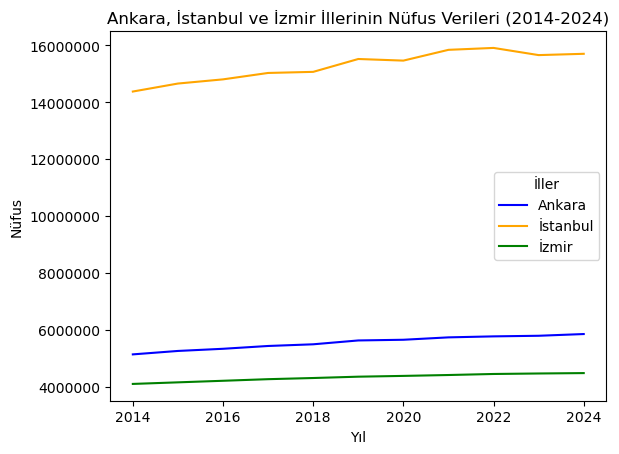

In [39]:
#Üç ilin nüfus verileri için çizgi grafiği yapalım

df_uzun_ankara = df_uzun[df_uzun['İL'] == 'Ankara']
df_uzun_istanbul = df_uzun[df_uzun['İL'] == 'İstanbul']
df_uzun_izmir = df_uzun[df_uzun['İL'] == 'İzmir']

sns.lineplot(data=df_uzun_ankara, x='Yıl', y='Nüfus', label='Ankara', color='blue')
sns.lineplot(data=df_uzun_istanbul, x='Yıl', y='Nüfus', label='İstanbul', color='orange')
sns.lineplot(data=df_uzun_izmir, x='Yıl', y='Nüfus', label='İzmir', color='green')
plt.ticklabel_format(axis='y', style='plain') # Y eksenindeki sayıları düz formatta gösteriyoruz
plt.title('Ankara, İstanbul ve İzmir İllerinin Nüfus Verileri (2014-2024)')
plt.xlabel('Yıl')
plt.ylabel('Nüfus')
plt.legend(title='İller')
plt.show()